# Manually solving a differential equation

* For reference, the function file which implements this method is titled `diffequ-manual.jl`

To begin, we run the following code so we can print our plots:

In [1]:
using Colors;
using Plots; gr();

Recalling that our differential equation is in the form of

$$ \dot{X} = f(t), X(0) = 0 $$

where $f(t) = \cos{2\pi t} + C$ and $C$ is an random value, we define our function $f(t)$ as follows:

In [2]:
# dX / dt = cos(2*pi*t)+randn(1), X(0) = 0
function f(t)
    y = cos(2.0*pi*t)+0.1*randn(1)[1];
end

f (generic function with 1 method)

This establishes our $f(t)$ within our `diffequ-manual.jl` file.

$$ \sim $$

To facilitate the interactive plotting of our solutions, we are going to define the "solving method" within a function, (aptly) labeled `manual`. This function will take in two arguments, `stop` and `stepsize`, to implement the *Euler Method* of solving a differential equation.

In [3]:
function manual(stop,stepsize)
    # stepsize
    h = stepsize;
    
    # t-values
    t = 0:h:stop;
    
    # number of points
    N = size(t)[1];
    
    # f(t) = X'(t) values
    f_list = zeros(1,N);
    for i = 1:N
        f_list[i] = f(t[i]);
    end
    
    # Euler method
    X = zeros(1,N);
    for j = 2:N
        X[j] = X[j-1] + h*f_list[j-1];
    end
    
    # Create array containing plot arguments
    manual_plot_args = [t,X'];
end

manual (generic function with 1 method)

This manual function creates an array containing all $f(t)$ values on our $t$-interval using our desired stepsize. Thereafter, it implements the Euler Method to create an array of interpolated values for our solution, $X(t)$. What the function returns is an array containing the two arguments we would need to create a plot. To plot our solution, we run the following code:

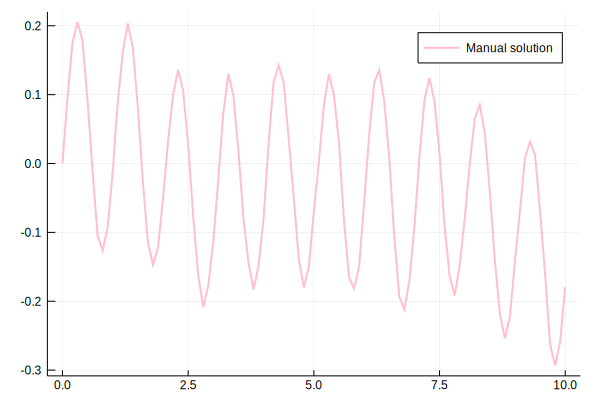

In [4]:
p1 = manual(10,0.1);
plot(p1[1],p1[2],lw=2,color=:pink,label="Manual solution")

$$\sim$$

# Using `DifferentialEquations.jl`

* For reference, the function file which implements this method is titled `diffequ-pkg.jl`

Although the solution we derived using our `manual` function is correct, it becomes inconvenient to have to manually implement an interpolation method for solving differential equations. Luckily, we have the convenient alternative of using the `DifferentialEquations.jl` package. Let's go ahead an initialize it, along with our `Plots` and `Colors`.

In [5]:
using DifferentialEquations;
using Colors;
using Plots; gr();

Just as before, we're going to encapsulate this solution method within a general function, this time labeled `pkg`. This function will take in the same arguments as the `manual` function, expect now `stop` must be entered as a float. Our `pkg` function is defined as follows:

In [6]:
function pkg(stop,stepsize)
    # define our differential equation
   f(u,p,t) = cos(2*pi*t); # note that despite having three arguments, we only have t in our declaration.
                           # this is because we have no parameters (p), nor do we have the original 
                           # function X(t) (u) in our differential equation.
    
    # define our initial condition
    u0 = 0.0;
    
    # define our time interval
    tspan = (0.0,stop);
    
    # use DifferentialEquations.jl to solve
    prob = ODEProblem(f,u0,tspan);
    sol = solve(prob,saveat=stepsize);
    return sol;
end

pkg (generic function with 1 method)

This function first initializes our differential equation of interest, with our desired initial condition and time interval (hardcoded within the function). Thereafter, it initializes our differential equation as an object of type `ODEProblem`, which can be recognized by the `DifferentialEquations` package when we run the command `solve`. The `saveat=stepsize` argument ensures that the package will interpolate at our desired stepsize. To plot this solution, we run the following code:

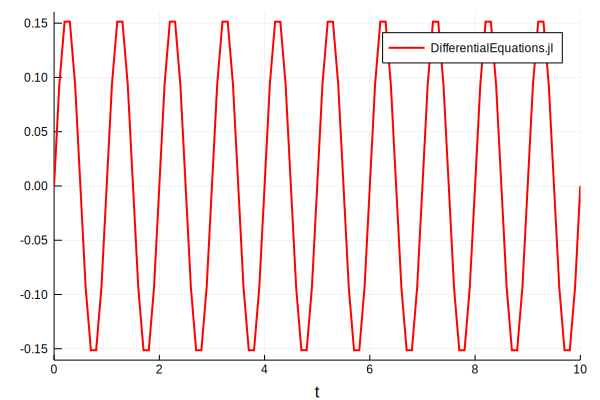

In [7]:
p2 = pkg(10.0,0.1)
plot(p2,lw=2,color=:red,label="DifferentialEquations.jl")

We can also compare our solutions to each other as follows:

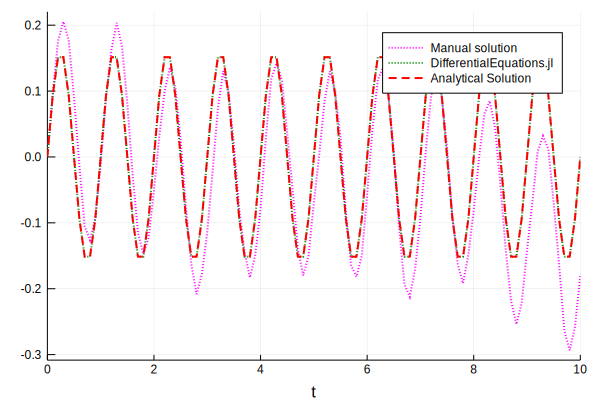

In [8]:
plot(p1[1],p1[2],lw=2,label="Manual solution",linestyle=:dot,color=:magenta)
plot!(p2,lw=2,label="DifferentialEquations.jl",linestyle=:dot,color=:green)
plot!(p2.t, t->(sin(2.0*pi*t)/(2*pi)),linestyle=:dash,color=:red,lw=2,label="Analytical Solution")

**Important to note is that only our manual solution involves any stochasity.**

If we wanted to make this an interactive plot, we can simply implement the `Interact.jl` package:

In [9]:
using Interact;

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/95fd6382ff12a81ec49f323fce76dc479975a40a-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/95fd6382ff12a81ec49f323fce76dc479975a40a-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Here is our code for the interactive plot:

In [10]:
@manipulate for t = 1:1:10
    p1int = manual(t,0.1);
    p2int = pkg(t,0.1);
    plot(p1int[1],p1int[2],lw=2,label="Manual solution",linestyle=:dot,color=:magenta)
    plot!(p2int,lw=2,label="DifferentialEquations.jl",linestyle=:dot,color=:green)
    plot!(p2int.t, t->(sin(2.0*pi*t)/(2*pi)),linestyle=:dash,color=:red,lw=2,label="Analytical Solution")
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:t=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
5), Observable{Int64} with 2 listeners. Value:
5, Scope("knockout-component-39561b02-1f45-4fe4-ae3f-de0ed75a7a48", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["t"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>10,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\luiss\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\luiss\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\luiss\\.julia\\packages\\InteractBase\\PTCUD\\src\\..\\assets\\all.js", "C:\\Users\\luiss\\.julia\\packages\\InteractBase\\PTCUD\\src\\..\\assets\\style.css", "C:\\Users\\luiss\\.julia\\packages\\InteractBulma\\PH56C\\src\\..\\assets\\main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":5}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-39561b02-1f45-4fe4-ae3f-de0ed75a7a48\",\"id\":\"ob_02\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-39561b02-1f45-4fe4-ae3f-de0ed75a7a48\",\"id\":\"ob_01\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"